Mounted at /content/drive

- The first Five Rows:
          hotel  cancellation_status  lead_time  arrival_date_year arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  weekend_nights  week_nights  adults  children  babies  \
0  Resort Hotel                    0        342               2015               July                        27                          1               0            0       2       0.0       0   
1  Resort Hotel                    0        737               2015               July                        27                          1               0            0       2       0.0       0   
2  Resort Hotel                    0          7               2015               July                        27                          1               0            1       1       0.0       0   
3  Resort Hotel                    0         13               2015               July                        27                          1               0        

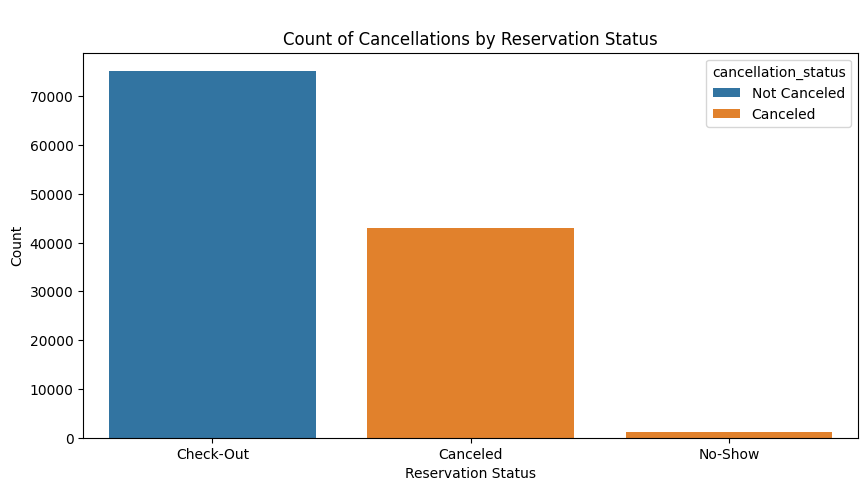

- Missing Values:
hotel                           0
cancellation_status             0
lead_time                       0
arrival_date_month              0
arrival_date_week_number        0
arrival_date_day_of_month       0
weekend_nights                  0
week_nights                     0
adults                          0
children                        4
babies                          0
meal                            0
market_segment                  0
distribution_channel            0
repeated_guest                  0
previous_cancellations          0
previous_successful_bookings    0
reserved_room_type              0
booking_changes                 0
deposit_type                    0
days_in_waiting_list            0
customer_type                   0
average_daily_rate              0
car_parking_spaces              0
special_requests_count          0
number_of_bookings              0
dtype: int64

- Final Version of Feature Data Types:
cancellation_status                 int64
lea

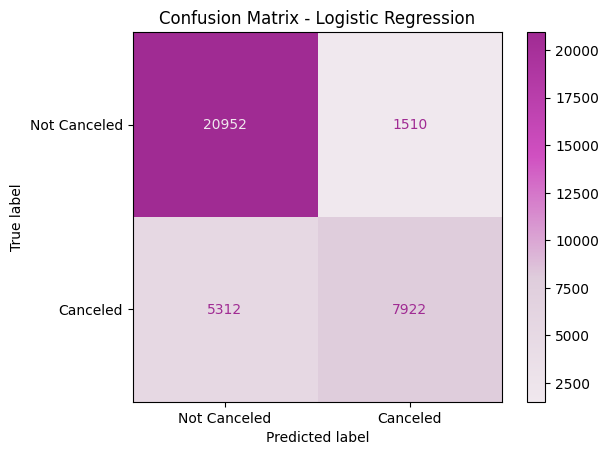


- Decision Tree Accuracy Score: 81.01%

- Decision Tree Confusion Matrix:
 [[18984  3478]
 [ 3299  9935]]

- Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85     22462
           1       0.74      0.75      0.75     13234

    accuracy                           0.81     35696
   macro avg       0.80      0.80      0.80     35696
weighted avg       0.81      0.81      0.81     35696



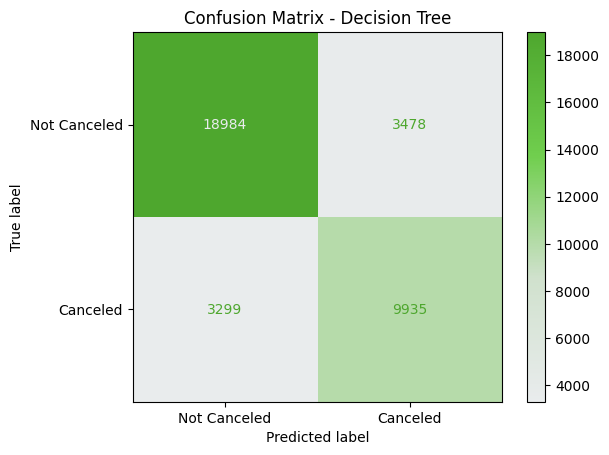


- Random Forest Accuracy Score: 85.88%

- Random Forest Confusion Matrix:
 [[20871  1591]
 [ 3450  9784]]

- Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89     22462
           1       0.86      0.74      0.80     13234

    accuracy                           0.86     35696
   macro avg       0.86      0.83      0.84     35696
weighted avg       0.86      0.86      0.86     35696



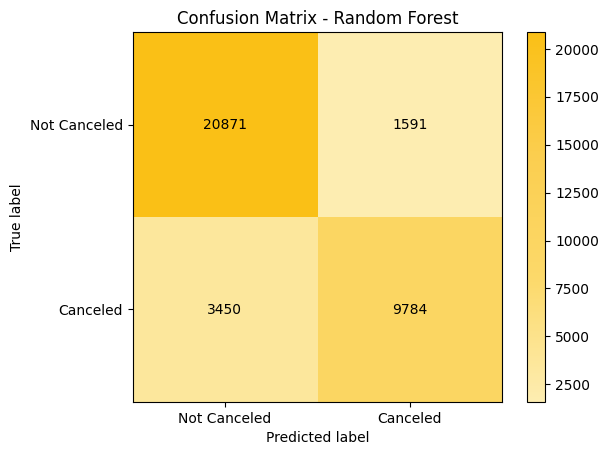


- Linear SVM Accuracy Score:80.52%

- Linear SVM Confusion Matrix:
 [[21181  1281]
 [ 5672  7562]]

- Linear SVM Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.94      0.86     22462
           1       0.86      0.57      0.69     13234

    accuracy                           0.81     35696
   macro avg       0.82      0.76      0.77     35696
weighted avg       0.81      0.81      0.79     35696



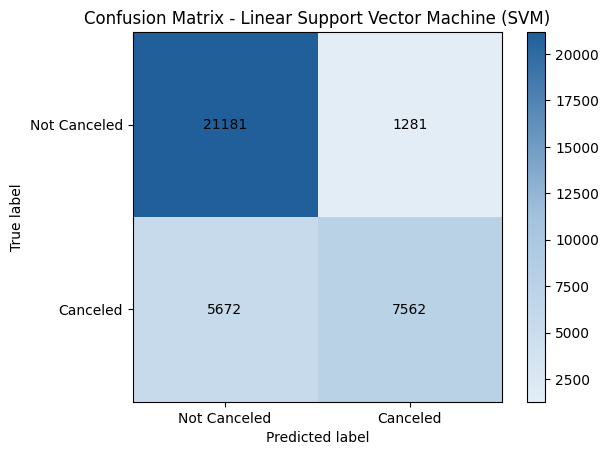


- Performance Comparison:


,Model,Accuracy,Precision (Class 1),Recall (Class 1),F1-score (Class 1)
0,Logistic Regression,0.81,0.83,0.59,0.69
1,Decision Tree,0.81,0.75,0.76,0.76
2,Random Forest,0.86,0.79,0.76,0.77
3,Linear SVM,0.81,0.86,0.57,0.69



- Predicted cancellation rate: 31.87%


In [1]:
#### Step1: Import Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import recall_score, precision_score, f1_score
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import display

# Set display options to improve table formatting
pd.set_option('display.width', 200)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

#### Step2: Dataset Overview

# Connect my Google Drive to Colab
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/Data/hotel_booking.csv'
df = pd.read_csv(file_path)

# Display the first 5 rows
df.head()

# Rename some columns for improving the clarity
df.rename (columns = {'is_canceled': 'cancellation_status',
                      'stays_in_weekend_nights':'weekend_nights',
                      'stays_in_week_nights':'week_nights',
                      'is_repeated_guest': 'repeated_guest',
                      'previous_bookings_not_canceled':'previous_successful_bookings',
                      'adr':'average_daily_rate',
                      'required_car_parking_spaces': 'car_parking_spaces',
                      'total_of_special_requests':'special_requests_count',
                      'phone-number': 'phone_number'}, inplace=True)

print (f'\n- The first Five Rows:\n{df.head()}')

# Number of rows and columns
df.shape
print(f'\n- Number of Rows : {df.shape[0]}')
print(f'- Number of Columns: {df.shape[1]}')

# Dataset basic information
print("\n- Dataset Basic Information:")
df.info()

# Convert columns to object type
categorical_cols = ['cancellation_status','arrival_date_year', 'repeated_guest', 'agent', 'company']

df[categorical_cols] = df[categorical_cols].astype('object')

# Verify the changes in data types
df.dtypes

# Get the statistical summary for numerical variables
print (f'\n- Statistical Summary of Numerical Features:\n{df.describe().T}')

# Get the statistical summary for categorical variables
print(f"\n- Statistical Summary of Categorical Features:\n{df.describe().T}")


# Step 3: Data Preprocessing

# 1. Remove directly related features: reservation_status, reservation_status_date, assigned_room_type
# Bivariate bar plot of 'cancellation_status' vs 'reservation_status' with specified colors
plt.figure(figsize=(10, 5))
sns.countplot(x='reservation_status', hue='cancellation_status', data=df)
plt.title('\nCount of Cancellations by Reservation Status')
plt.xlabel('Reservation Status')
plt.ylabel('Count')
plt.legend(title='cancellation_status', labels=['Not Canceled', 'Canceled'])
plt.show()

# Drop the "reservation_status", "reservation_status_date" and "assigned_room_type" feature
df = df.drop(['reservation_status', 'reservation_status_date', 'assigned_room_type'], axis=1)

# 2.Drop irrelevant features:
df=df.drop(['arrival_date_year', 'country', 'agent', 'company', 'email', 'phone_number', 'credit_card'], axis=1)

# Feature engineering for "name" feature
# Create a new feature representing the number of bookings made by each guest (based on the name)
df['number_of_bookings'] = df.groupby('name')['name'].transform('count')
df[['number_of_bookings']].head()

# Drop the original "name" feature
df = df.drop(['name'],axis=1)

# 3. check the missing values
print(f'- Missing Values:\n{df.isnull().sum()}')

# Get the count of each unique value in the 'children' column
df['children'].value_counts()

# Impute missing values in 'children' column with 0 (Mode)
df['children'] = df['children'].fillna(0)

# Check if there are any missing values left in 'children' column
df['children'].isnull().sum()

# 4. Handeling noisy data
# Analyze noisy data
noisy_data = {
    'average_daily_rate': df[df['average_daily_rate'] < 0],
    'adults': df[df['adults'] == 0],
    'children': df[df['children'] == 10],
    'babies': df[df['babies'] == 10],
}
noisy_data_count = {key: len(value) for key, value in noisy_data.items()}
noisy_data_count

# Replace negative "average_daily_rate" value with median
df.loc[df['average_daily_rate'] < 0, 'average_daily_rate'] = df['average_daily_rate'].median()

# Remove rows with 0 adults
df = df.drop(df[df['adults'] == 0].index)

# Remove rows with 10 children or 10 babies
df = df.drop(df[df['children'] == 10].index)
df = df.drop(df[df['babies'] == 10].index)

# Reset the index
df.reset_index(drop=True, inplace=True)

# Check if the noisy data has been handled
noisy_data_handled = {
    'average_daily_rate': df[df['average_daily_rate'] < 0],
    'adults': df[df['adults'] == 0],
    'children': df[df['children'] == 10],
    'babies': df[df['babies'] == 10],
}

noisy_data_handled_count = {key: len(value) for key, value in noisy_data_handled.items()}
noisy_data_handled_count

# 5. Encoding categorical features
# Reviewing the categorical features
df.dtypes

# Convert 'arrival_date_month' to numerical values
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['arrival_date_month'] = df['arrival_date_month'].apply(lambda x: months.index(x) + 1)

# Convert "repeated_guest" and "cancelation_status#"to integer
df[['repeated_guest', 'cancellation_status']] = df[['repeated_guest', 'cancellation_status']].astype(int)


# One-hot encoding for the specified columns
one_hot_cols = ['hotel', 'meal', 'market_segment', 'distribution_channel','reserved_room_type', 'deposit_type', 'customer_type']
df = pd.get_dummies(df, columns=one_hot_cols)

# Check the type of the features again
print (f'\n- Final Version of Feature Data Types:\n{df.dtypes}')

# 6. Feature Scaling
# Define the features (X) and the output labels (y)
X = df.drop('cancellation_status', axis=1)
y = df['cancellation_status']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### Step 4: Machine Learning Modele Building

# 1. Logistic Regression Model
# Initialize and train Logistic Regression model
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lg = log_model.predict(X_test_scaled)

# Evaluate the model
accuracy_lg = accuracy_score(y_test, y_pred_lg)
cm_lg = confusion_matrix(y_test, y_pred_lg)
print(f'\n- Logistic Regression Accuracy Score: {round(accuracy_lg*100,2)}%')
print(f'\n- Logistic Regression Confusion Matrix:\n {cm_lg}')
print(f'\n- Logistic Regression Classification Report:\n {classification_report(y_test, y_pred_lg)}')

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lg, display_labels=['Not Canceled', 'Canceled'])
custom_colors = ['#F0E8EE', '#DFCDDC', '#D050C1', '#A02B93']
custom_cmap = LinearSegmentedColormap.from_list("custom_purple", custom_colors)
disp.plot(cmap=custom_cmap, values_format='d')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# 2. Decision Tree Model
# Initialize and train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(f'\n- Decision Tree Accuracy Score: {round(accuracy_dt*100,2)}%')
print(f'\n- Decision Tree Confusion Matrix:\n {cm_dt}')
print(f'\n- Decision Tree Classification Report:\n{classification_report(y_test, y_pred_dt)}')

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['Not Canceled', 'Canceled'])
custom_colors = ['#E9ECED','#D0E1CD','#70CE4E','#4EA72E']
custom_cmap = LinearSegmentedColormap.from_list("custom_green", custom_colors)
disp.plot(cmap=custom_cmap, values_format='d')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# 3. Random Forest Model
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(f'\n- Random Forest Accuracy Score: {round(accuracy_rf*100,2)}%')
print(f'\n- Random Forest Confusion Matrix:\n {cm_rf}')
print(f'\n- Random Forest Classification Report:\n {classification_report(y_test, y_pred_rf)}')

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Not Canceled', 'Canceled'])
custom_colors = ['#FDEDB1','#FCD96A','#FBCE4F','#FAC016']
custom_cmap = LinearSegmentedColormap.from_list("custom_yellow", custom_colors)
disp.plot(cmap=custom_cmap, values_format='d', text_kw={"color": "black"})
plt.title('Confusion Matrix - Random Forest')
plt.show()

# 4. Linear SVM Model
# Initialize and train the Linear SVM model
linear_svm_model = LinearSVC(random_state=42, max_iter=10000)
linear_svm_model.fit(X_train_scaled, y_train)

# Make Predictions
y_pred_linear_svm = linear_svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_linear_svm)
cm_svm = confusion_matrix(y_test, y_pred_linear_svm)
print(f'\n- Linear SVM Accuracy Score:{round(accuracy_svm*100,2)}%')
print(f'\n- Linear SVM Confusion Matrix:\n {cm_svm}')
print(f'\n- Linear SVM Classification Report:\n {classification_report(y_test, y_pred_linear_svm)}')

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=['Not Canceled', 'Canceled'])
custom_colors = ['#E2EDF6','#A3C2DE','#215F9A']
custom_cmap = LinearSegmentedColormap.from_list("custom_blue", custom_colors)
disp.plot(cmap=custom_cmap, values_format='d', text_kw={"color": "black"})
plt.title('Confusion Matrix - Linear Support Vector Machine (SVM)')
plt.show()

#### Step 5: Creat A Performance Comparison dataframe
# Create performance results for each model
lr_result = pd.Series({
    'Model': 'Logistic Regression',
    'Accuracy': accuracy_lg,
    'Precision (Class 1)': 0.83,
    'Recall (Class 1)': 0.59,
    'F1-score (Class 1)': 0.69
})

dt_result = pd.Series({
    'Model': 'Decision Tree',
    'Accuracy': accuracy_dt,
    'Precision (Class 1)': 0.75,
    'Recall (Class 1)': 0.76,
    'F1-score (Class 1)': 0.76
})

rf_result = pd.Series({
    'Model': 'Random Forest',
    'Accuracy': accuracy_rf,
    'Precision (Class 1)': 0.79,
    'Recall (Class 1)': 0.76,
    'F1-score (Class 1)': 0.77
})

svm_result = pd.Series({
    'Model': 'Linear SVM',
    'Accuracy': accuracy_svm,
    'Precision (Class 1)': 0.86,
    'Recall (Class 1)': 0.57,
    'F1-score (Class 1)': 0.69
})

# Combine into a dataframe
results = pd.DataFrame([lr_result, dt_result, rf_result, svm_result])

# Highlight the best model with highest accuracy and F1-score
def highlight_best_model(row):
    is_best_model = (
        row['Accuracy'] == results['Accuracy'].max() and
        row['F1-score (Class 1)'] == results['F1-score (Class 1)'].max()
    )
    return ['background-color: royalblue; color: white' if is_best_model else '' for _ in row]

styled_results = results.style.apply(highlight_best_model, axis=1).format(precision=2)
print('\n- Performance Comparison:')
display(styled_results)

# Calculate "predicted cancellation rate" using random forest model predictions (Since it was the best model)
cancellation_rate = sum(y_pred_rf) / len(y_pred_rf)
print(f'\n- Predicted cancellation rate: {cancellation_rate:.2%}')